CREDIT CARD LEAD PREDICTION

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
#For Missing Value and Feature Engineering
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

import time

In [2]:
#loading the datset and reading them
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [7]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [8]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


univariate analysis

In [9]:
train.Gender.value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

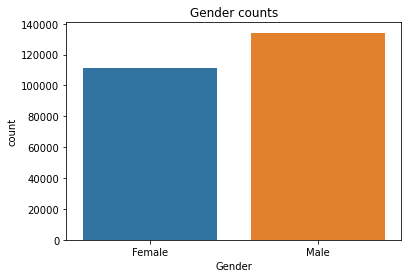

In [10]:
ax = sns.countplot(x='Gender', data=train)
ax.set_title('Gender counts')
plt.show()

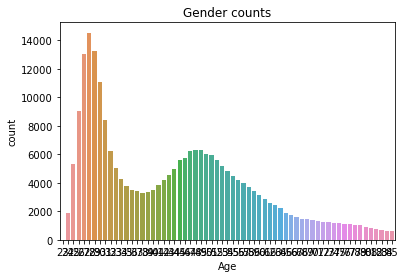

In [11]:
ax = sns.countplot(x='Age', data=train)
ax.set_title('Gender counts')
plt.show()

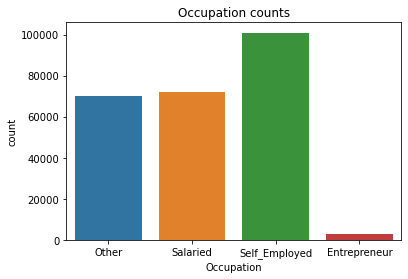

In [12]:

ax = sns.countplot(x='Occupation', data=train)
ax.set_title('Occupation counts')
plt.show()

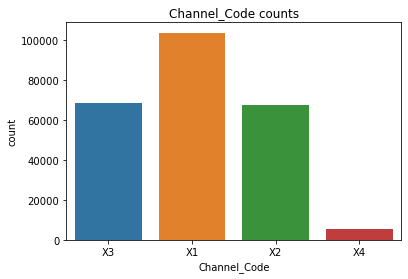

In [13]:
ax = sns.countplot(x='Channel_Code', data=train)
ax.set_title('Channel_Code counts')
plt.show()

<AxesSubplot:>

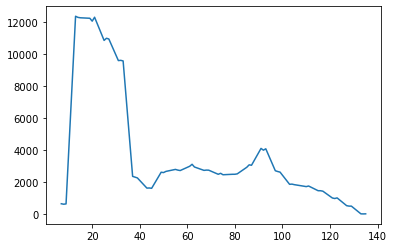

In [14]:
train['Vintage'].value_counts().sort_index().plot.line()

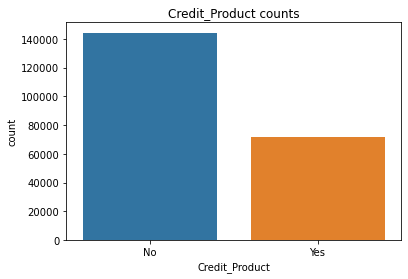

In [15]:
ax = sns.countplot(x='Credit_Product', data=train)
ax.set_title('Credit_Product counts')
plt.show()

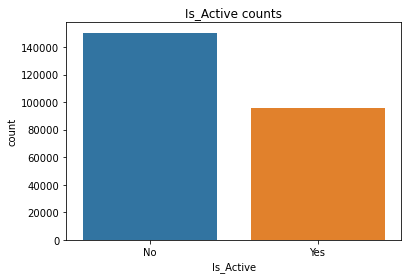

In [16]:
ax= sns.countplot(x='Is_Active', data=train)
ax.set_title('Is_Active counts')
plt.show()

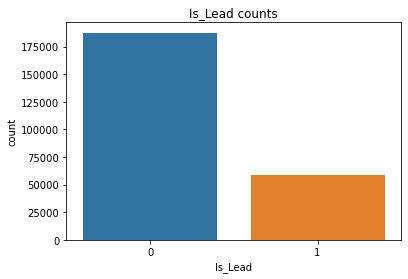

In [17]:
ax= sns.countplot(x='Is_Lead', data=train)
ax.set_title('Is_Lead counts')
plt.show()

bivariate analysis

<AxesSubplot:xlabel='Gender', ylabel='Age'>

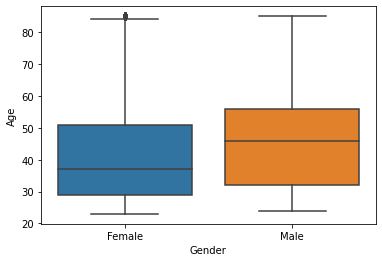

In [18]:
sns.boxplot(x="Gender", y="Age", data=train)

Text(0.5, 1.0, 'Male/female in each occupation')

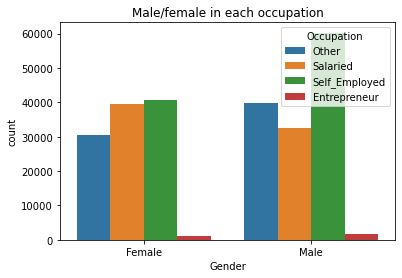

In [19]:
ax = sns.countplot(x="Gender",hue='Occupation',data=train)
ax.set_title("Male/female in each occupation")

Text(0.5, 1.0, 'Male/female in each Credit_Product')

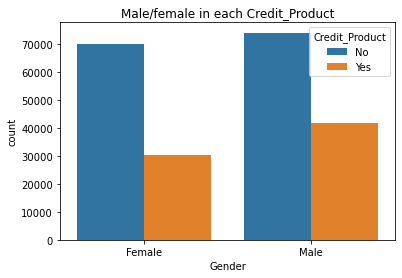

In [20]:

ax = sns.countplot(x="Gender",hue='Credit_Product', data=train)
ax.set_title("Male/female in each Credit_Product")

Text(0.5, 1.0, 'Male/female in Is_Lead')

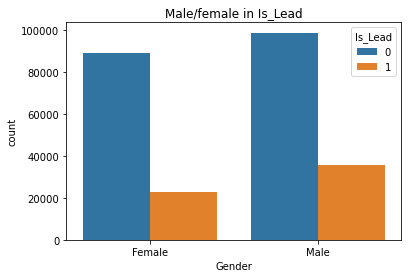

In [21]:
ax = sns.countplot(x="Gender",hue='Is_Lead', data=train)
ax.set_title("Male/female in Is_Lead")

In [22]:
X = train.drop(['ID', 'Is_Lead'], axis=1)
y = train['Is_Lead']

In [23]:
#segregation of categorical and numerical features
numerical_features = [c for c, dtype in zip(X.columns, X.dtypes)
                     if dtype.kind in ['i','f']]
categorical_features = [c for c, dtype in zip(X.columns, X.dtypes)
                     if dtype.kind not in ['i','f']]

In [24]:
numerical_features

['Age', 'Vintage', 'Avg_Account_Balance']

In [25]:
categorical_features

['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

In [26]:
#conversion of categorical data
for i in categorical_features:
  X[i]=X[i].astype('category').cat.codes.values

In [27]:
#splitting of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,  y, test_size=0.3, random_state=0, stratify=y)

In [28]:
X_train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
48912,0,47,11,1,2,25,0,649477,1
222729,0,32,14,1,0,31,0,691352,0
133453,0,28,4,2,0,32,0,1544310,0
73011,0,50,11,3,2,15,0,899647,0
133583,1,37,20,3,1,13,1,632959,0
...,...,...,...,...,...,...,...,...,...
150155,0,44,7,2,2,15,-1,408323,0
25510,0,49,31,3,1,67,1,943435,0
171903,1,35,11,2,0,19,0,1275129,0
60775,0,54,33,1,2,111,1,937953,1


In [29]:
#making pipeline
preprocessor = make_column_transformer(
    
    (make_pipeline(
    KNNImputer(n_neighbors=2, weights="uniform")), numerical_features),
    
    (make_pipeline(
    SimpleImputer(strategy = 'most_frequent', fill_value = 'missing')),
     categorical_features)
    
)

In [30]:
preprocessor_bst = make_pipeline(preprocessor, 
                                  VarianceThreshold())
XGB_Model = make_pipeline(preprocessor_bst, XGBClassifier())


In [31]:
param_grid = {
 "xgbclassifier__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "xgbclassifier__max_depth"        : [ 3, 4, 5, 6],
 "xgbclassifier__min_child_weight" : [ 1, 3, 5 ],
 "xgbclassifier__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "xgbclassifier__colsample_bytree" : [  0.5 , 0.7,1.0 ]   
}

In [32]:
#random search cv 
from sklearn.model_selection import RandomizedSearchCV
xgb_RandomGrid = RandomizedSearchCV(estimator = XGB_Model, param_distributions = param_grid, cv = 5, verbose=3, n_jobs = -1, scoring = 'roc_auc', n_iter = 5)

In [33]:
#xgb model
xgb_RandomGrid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:10:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('columntransformer',
                                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                                Pipeline(steps=[('knnimputer',
                                                                                                                 KNNImputer(n_neighbors=2))]),
                                                                                                ['Age',
                                                                                                 'Vintage',
                                                                                                 'Avg_Account_Balance']),
                                                                                               ('pipeline-2',
         

In [34]:
xgb_RandomGrid.best_estimator_

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('knnimputer',
                                                                                    KNNImputer(n_neighbors=2))]),
                                                                   ['Age',
                                                                    'Vintage',
                                                                    'Avg_Account_Balance']),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(fill_value='missing',
                                                                          

In [35]:
print(f'Train : {xgb_RandomGrid.score(X_train, y_train):.3f}')
print(f'Test : {xgb_RandomGrid.score(X_test, y_test):.3f}')

Train : 0.885
Test : 0.874


In [36]:
from sklearn.metrics import roc_auc_score
print(f'Train AUC : {roc_auc_score(y_train, xgb_RandomGrid.predict_proba(X_train)[:,1]):.3f}')
print(f'Test AUC : {roc_auc_score(y_test, xgb_RandomGrid.predict_proba(X_test)[:,1]):.3f}')

Train AUC : 0.885
Test AUC : 0.874


In [37]:
#conversion of testing categorical data
for i in categorical_features:
  test[i]=test[i].astype('category').cat.codes.values

In [38]:
test_pred = xgb_RandomGrid.predict_proba(test[X.columns])[:,1]

In [39]:
#submission
Sub = pd.DataFrame({ 'ID': test['ID'],
                       'Is_Lead' : test_pred})

In [40]:

Sub.to_csv('submission.csv', index = False)
